# Análisis de redes en Python  (Networkx)

## Bienvenidas :D

En esta sesión aprenderemos a utilizar la librería "Networkx" (http://networkx.readthedocs.io/en/networkx-1.11/index.html) que es una librería de Python para la crecación, manipulación y estudio de la estructura, dinámicas y función de redes complejas.

## Que es una red compleja 
Las redes complejas son conjuntos de muchos nodos conectados que interactúan de alguna forma. A los nodos de una red también se les llama vértices o elementos y los representaremos por los símbolos v1, v2, ..., vN , donde N es el número total de nodos en la red. Si un nodo vi está conectado con otro nodo vj, esta conexión se representa por una pareja ordenada (vi, vj ).

# Ejemplos de redes

## Redes Sociales
![imagen](Socialnetwork.jpg)

## Redes Informaticas
![imagen](computernetwork.jpg)

## Redes Biológicas

![imagen](Brainetwork.jpg)
![imagen](protein protein interactions.jpg)



# Empezamos!

## Creemos una gráfica vacía

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as gr
import scipy as sc

In [3]:
G=nx.Graph()
G.graph

{}

# Ahora le vamos a agregar nodos

In [4]:
"""
    Uno a uno
"""
G.add_node(1)  

"""
    O en forma de lista
"""

G.add_nodes_from([2,3,4,5])

G.node

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}}

# Borremos los nodos

In [5]:
"""
Uno a uno
"""
G.remove_node(3)
G.node


{1: {}, 2: {}, 4: {}, 5: {}}

In [6]:

"""
Todos
"""

G.clear()
G.node

{}

In [7]:
"""
Podemos añadir nodos a partir de una variable
"""

H=[5, 6, 7, 8, 9, 12]
G.add_nodes_from(H)
G.node

{5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 12: {}}

In [8]:
H=nx.path_graph(10)
G.add_nodes_from(H)
G.node
#print (H)


{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 12: {}}

## Vamos a darle nombre!

Se pueden asignar atributos a la gráfica como a cada uno de sus elementos. Los nodos pueden ser también strings!

In [9]:
GPL=nx.Graph(Name=["Pyladies"], librería= "Scipy")
GPL.graph

{'Name': ['Pyladies'], 'librería': 'Scipy'}

In [10]:
"""
Ahora vamos a editar el atributo
"""

GPL.graph['librería']='Networkx'
GPL.graph

{'Name': ['Pyladies'], 'librería': 'Networkx'}

In [11]:
"""
Empecemos a añadir los nodos
"""

GPL.add_node('Erika')

GPL.add_nodes_from("Ale", edad = 30 )  # que pasa si hacemos esto???

GPL.nodes(data=True)

[('e', {'edad': 30}), ('Erika', {}), ('A', {'edad': 30}), ('l', {'edad': 30})]

Ups!! ahora hay que borrar esos nodos!.. como lo hacemos??

Tip: remove_nodes_from

In [12]:
GPL.remove_nodes_from(['A','l','e'])
GPL.node

{'Erika': {}}

In [13]:
GPL.add_node("Ale", edad = 30 )
GPL.node["Ale"]

{'edad': 30}

In [14]:
GPL.node['Ale']['entidad'] = 'IFC'
GPL.node


{'Ale': {'edad': 30, 'entidad': 'IFC'}, 'Erika': {}}

In [15]:
GPL.number_of_nodes()

2

## Nos faltan más miembros del grupo y sus datos... como lo hacemos?

Ejemplo:

In [16]:
GPL.add_node('Jane Doe', edad = 25, entidad = 'Ciencias')


In [17]:
GPL.nodes(data=True)

[('Erika', {}),
 ('Jane Doe', {'edad': 25, 'entidad': 'Ciencias'}),
 ('Ale', {'edad': 30, 'entidad': 'IFC'})]

# ahora vamos con los vertices!

In [18]:
GPL.add_edge('Ale','Erika')
GPL.edge

{'Ale': {'Erika': {}}, 'Erika': {'Ale': {}}, 'Jane Doe': {}}

In [19]:
e=('Erika','Jane Doe')
GPL.add_edge(*e)
GPL.edge

{'Ale': {'Erika': {}},
 'Erika': {'Ale': {}, 'Jane Doe': {}},
 'Jane Doe': {'Erika': {}}}

In [20]:
GPL.add_edges_from([('Jane Doe','Ale'),('Ale','Marco')])
GPL.number_of_edges()
# ¿pero que pasó aqui? Marco no estaba incluido en los nodos del grupo Pyladies


4

In [21]:
GPL.node

{'Ale': {'edad': 30, 'entidad': 'IFC'},
 'Erika': {},
 'Jane Doe': {'edad': 25, 'entidad': 'Ciencias'},
 'Marco': {}}

# Edge Attributes
Podemos añadir y manipular los atributos de los vertices usando add_edge(), add_edges_from(), subscript notation, or G.edge.

In [22]:
GPL.add_edge(2,5, weight=2)

GPL.add_edges_from([('Erika','Jane Doe'),('Jane Doe','Ale')], color='red')

GPL.add_edges_from([('Ale','Marco',{'color':'blue'}), ('Erika','Erin',{'weight':8}), (3,5,{'weight':8})])

GPL['Ale']['Erika']['weight'] = 3

GPL.edge['Ale']['Marco']['weight'] = 4

GPL.edge

{'Ale': {'Erika': {'weight': 3},
  'Jane Doe': {'color': 'red'},
  'Marco': {'color': 'blue', 'weight': 4}},
 2: {5: {'weight': 2}},
 3: {5: {'weight': 8}},
 'Marco': {'Ale': {'color': 'blue', 'weight': 4}},
 5: {2: {'weight': 2}, 3: {'weight': 8}},
 'Erika': {'Ale': {'weight': 3},
  'Erin': {'weight': 8},
  'Jane Doe': {'color': 'red'}},
 'Jane Doe': {'Ale': {'color': 'red'}, 'Erika': {'color': 'red'}},
 'Erin': {'Erika': {'weight': 8}}}

## ¿Entonces quien quedó con quien?

In [23]:
GPL.neighbors('Erika') 

['Ale', 'Jane Doe', 'Erin']

In [24]:
GPL.degree('Erika') 

3

## ¿Que más le podemos preguntar a nuestra gráfica?

1. La distribución de conexiones (o vecinos) P (k): Es la probabilidad de que un nodo escogido al azar tenga k conexiones (o vecinos). (degree distribution)
Por ejemplo, en una red de contactos sexuales P (k) es la probabilidad de que una persona escogida al azar en una sociedad haya tenido k parejas sexuales distintas a lo largo de su vida.

2. El coeficiente de agrupamiento C: Es la probabilidad de que dos nodos estén conectados directamente a un tercer nodo, estén conectados entre sí. (clustering coefficient)
Por ejemplo, en una red de amistades, es la probabilidad  de que dos de mis amigos sean ellos mismos amigos uno del otro.

3. La longitud mínima  entre dos nodos vi y vj: Es el número mínimo de “brincos”que se tienen que dar para llegar de un nodo vi de la red a otro nodo vj de la red. (path lenght)

4. La longitud promedio de la red L: Es el promedio de las longitudes mínimas entre todas las posibles parejas de nodos (vi, vj) de la red.


# Algoritmos y funciones

http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.html

Podemos usar varios algoritmos y funciones que nos dan información acerca de la red, por ejemplo:

average_clustering(G, nodes=None, weight=None, count_zeros=True) : Es el coeficiente de agrupamiento.
Compute the average clustering coefficient for the graph G.

shortest_path_length(G[, source, target, weight]) Encuentra el camino mas corto entre los nodos	
Compute shortest path lengths in the graph.




Ejemplos:

In [25]:
nx.info(GPL)
#nx.info(GPL, 'Ale')

'Name: \nType: Graph\nNumber of nodes: 8\nNumber of edges: 7\nAverage degree:   1.7500'

In [26]:
nx.clustering(GPL)

{'Ale': 0.3333333333333333,
 2: 0.0,
 3: 0.0,
 'Marco': 0.0,
 5: 0.0,
 'Erika': 0.3333333333333333,
 'Jane Doe': 1.0,
 'Erin': 0.0}

In [27]:
nx.degree(GPL)

{'Ale': 3, 2: 1, 3: 1, 'Marco': 1, 5: 2, 'Erika': 3, 'Jane Doe': 2, 'Erin': 1}

In [28]:
nx.degree_histogram(GPL)

[0, 4, 2, 2]

# Podemos usar las funciones y algoritmos dentro de otras funciones

In [29]:
degree=list();
clustering=list();

for n in sc.arange(len(GPL.node)):   # Some properties of the graph
    degree.append(sorted(nx.degree(GPL,[n]).values())) # así nos regresa solo los valores de grado
    #degree.append(nx.degree(GPL,[n]))
        #así nos regresa los nodos con su correspondiente valor de grado de conectividad
    clustering.append(nx.clustering(GPL,[n]))
    
print(degree)
print(clustering)


#¿que pasó aqui?... no esta accesando a la informacion de los nodos que son strings y no números... cuidado con eso!


[[], [], [1], [1], [], [2], [], []]
[{}, {}, {2: 0.0}, {3: 0.0}, {}, {5: 0.0}, {}, {}]


In [31]:
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)

nx.dijkstra_path(G,'a','d') # encuentra el camino mas corto y con mayor peso entre los nodos 


['a', 'c', 'd']

# También podemos generar la matriz adjacente a otros formatos 

In [32]:
A = nx.to_scipy_sparse_matrix(GPL)
print(A.todense())


[[0 0 0 4 0 3 1 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 8 0 0 0]
 [4 0 0 0 0 0 0 0]
 [0 2 8 0 0 0 0 0]
 [3 0 0 0 0 0 1 8]
 [1 0 0 0 0 1 0 0]
 [0 0 0 0 0 8 0 0]]


In [33]:
A = nx.to_numpy_matrix(GPL)
print(A)

[[ 0.  0.  0.  4.  0.  3.  1.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  8.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  8.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0.  0.  1.  8.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  8.  0.  0.]]


In [34]:
A = nx.to_pandas_dataframe(GPL)
print(A)

          Ale    2    3  Marco    5  Erika  Jane Doe  Erin
Ale       0.0  0.0  0.0    4.0  0.0    3.0       1.0   0.0
2         0.0  0.0  0.0    0.0  2.0    0.0       0.0   0.0
3         0.0  0.0  0.0    0.0  8.0    0.0       0.0   0.0
Marco     4.0  0.0  0.0    0.0  0.0    0.0       0.0   0.0
5         0.0  2.0  8.0    0.0  0.0    0.0       0.0   0.0
Erika     3.0  0.0  0.0    0.0  0.0    0.0       1.0   8.0
Jane Doe  1.0  0.0  0.0    0.0  0.0    1.0       0.0   0.0
Erin      0.0  0.0  0.0    0.0  0.0    8.0       0.0   0.0


# Tambien podemos importar a partir de varias estructuras de datos

Por ejemplo:

from_pandas_dataframe(df, source, target, edge_attr=None, create_using=None)

In [2]:
import pandas as pd
import numpy as np
r = np.random.RandomState(seed=5)
ints = r.randint(1, 10, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df['a'] = a
df['b'] = b
df

,weight,cost,a,b
0,4,7,A,D
1,7,1,B,A
2,9,5,C,E


In [3]:
G=nx.from_pandas_dataframe(df, 'a', 'b', ['weight', 'cost'])
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 5\nNumber of edges: 3\nAverage degree:   1.2000'

In [4]:
G['E']['C']['cost']

5

# O de diferentes tipos de archivos como por ejemplo ".graphml" o ".leda"

http://networkx.readthedocs.io/en/networkx-1.11/reference/readwrite.html

#El archivo que vamos a usar para el ejemplo contiene información acerca de la conectividad entre las áreas del cerebro de un mono rhesus

Archivos como éste los podemos descargar de  http://openconnecto.me/graph-services/download/

In [41]:
RB=nx.read_leda('rhesus_brain_2.leda')  
#RB=nx.read_graphml('rhesus_brain_2.graphml')  
nx.info(RB)



'Name: \nType: DiGraph\nNumber of nodes: 91\nNumber of edges: 628\nAverage in degree:   6.9011\nAverage out degree:   6.9011'

In [40]:
RB.node

{'1': {},
 '10': {},
 '11': {},
 '12': {},
 '13': {},
 '14': {},
 '2': {},
 '23': {},
 '24a': {},
 '24b': {},
 '24c': {},
 '24d': {},
 '25': {},
 '29/30': {},
 '3': {},
 '31': {},
 '32': {},
 '44': {},
 '45A': {},
 '45B': {},
 '46d': {},
 '46v': {},
 '5': {},
 '7A': {},
 '7B': {},
 '7m': {},
 '7op': {},
 '8B': {},
 '8L': {},
 '8m': {},
 '8r': {},
 '9': {},
 '9/46d': {},
 '9/46v': {},
 'AIP': {},
 'CORE': {},
 'DP': {},
 'ENTORHINAL': {},
 'F1': {},
 'F2': {},
 'F3': {},
 'F4': {},
 'F5': {},
 'F6': {},
 'F7': {},
 'FST': {},
 'Gu': {},
 'INSULA': {},
 'IPa': {},
 'LB': {},
 'LIP': {},
 'MB': {},
 'MIP': {},
 'MST': {},
 'MT': {},
 'OPAI': {},
 'OPRO': {},
 'PBc': {},
 'PBr': {},
 'PERIRHINAL': {},
 'PGa': {},
 'PIP': {},
 'PIRIFORM': {},
 'Parainsula': {},
 'Pro.St.': {},
 'ProM': {},
 'SII': {},
 'STPc': {},
 'STPi': {},
 'STPr': {},
 'SUBICULUM': {},
 'TEMPORAL_POLE': {},
 'TEO': {},
 'TEOm': {},
 'TEa/ma': {},
 'TEa/mp': {},
 'TEad': {},
 'TEav': {},
 'TEpd': {},
 'TEpv': {},
 'TH/T

In [42]:
nx.is_directed(RB)

True

In [47]:
RB.neighbors('VIP')

['STPc', '7A', 'DP', '8m', 'V2', '8L', 'MT']

In [48]:
RB.node['VIP']

{}

In [49]:
RB.edge['VIP']

{'7A': {'label': ''},
 '8L': {'label': ''},
 '8m': {'label': ''},
 'DP': {'label': ''},
 'MT': {'label': ''},
 'STPc': {'label': ''},
 'V2': {'label': ''}}

In [50]:
nx.flow_hierarchy(RB) 
#Returns the flow hierarchy of a directed network.
#Flow hierarchy is defined as the fraction of edges not participating in cycles in a directed graph 

0.8423566878980892

In [55]:
largest_sc = sorted(nx.strongly_connected_components(RB))
#largest_sc = max(nx.strongly_connected_components(RB))
largest_sc

{'7A', '8L', '8m', 'DP', 'MT', 'STPc', 'TEO', 'TEpd', 'V1', 'V2', 'V4'}

In [54]:
AttarctComp=sorted(nx.attracting_components(RB))
AttarctComp

[{'7A', '8L', '8m', 'DP', 'MT', 'STPc', 'TEO', 'TEpd', 'V1', 'V2', 'V4'}]

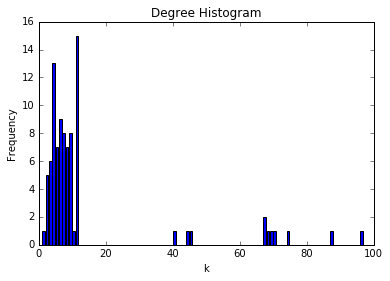

In [56]:
degree=(nx.degree_histogram(RB))
degreeX=(sc.arange(len(degree)))

gr.bar(degreeX, degree)
gr.title("Degree Histogram")
gr.xlabel("k")
gr.ylabel("Frequency")

fig = gr.gcf()

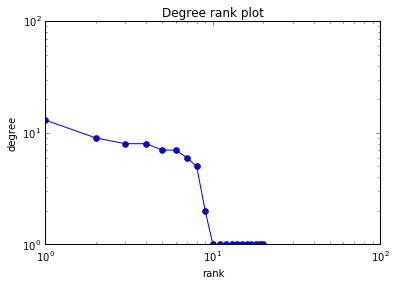

In [57]:
degree_sequence=sorted(degree,reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

gr.loglog(degree_sequence,'b-',marker='o')
gr.title("Degree rank plot")
gr.ylabel("degree")
gr.xlabel("rank")

#gr.savefig("degree_histogram.png")
gr.show()


## Ejercicio

Ahora podemos practicar leyendo y analizando el archivo:   mixed.species_brain_1.graphml






# Generadores de gráficas

## Para hacer nuestros ejercicios podemos usar generadores de redes que ya tenemos a

## disposición en Networkx por ejemplo:

barbell_graph(m1, m2[, create_using]) Return the Barbell Graph: two complete graphs connected by a path.

complete_graph(n[, create_using]) Return the complete graph K_n with n nodes.

complete_multipartite_graph(*block_sizes) Returns the complete multipartite graph with the specified block sizes.

dorogovtsev_goltsev_mendes_graph(n[, ...]) Return the hierarchically constructed Dorogovtsev-Goltsev-Mendes graph.

grid_graph(dim[, periodic]) Return the n-dimensional grid graph.

hypercube_graph(n) Return the n-dimensional hypercube.

lollipop_graph(m, n[, create_using]) Return the Lollipop Graph; Km connected to Pm.

path_graph(n[, create_using]) Return the Path graph P_n of n nodes linearly connected by n-1 edges.

wheel_graph(n[, create_using]) Return the wheel graph: a single hub node connected to each node of the (n-1)-node cycle graph

In [14]:
W=nx.wheel_graph(10)
W.edge

{0: {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}},
 1: {0: {}, 2: {}, 9: {}},
 2: {0: {}, 1: {}, 3: {}},
 3: {0: {}, 2: {}, 4: {}},
 4: {0: {}, 3: {}, 5: {}},
 5: {0: {}, 4: {}, 6: {}},
 6: {0: {}, 5: {}, 7: {}},
 7: {0: {}, 6: {}, 8: {}},
 8: {0: {}, 7: {}, 9: {}},
 9: {0: {}, 1: {}, 8: {}}}

In [15]:
G=nx.complete_graph(8)
G.edge

{0: {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 1: {0: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 2: {0: {}, 1: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 3: {0: {}, 1: {}, 2: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 4: {0: {}, 1: {}, 2: {}, 3: {}, 5: {}, 6: {}, 7: {}},
 5: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 6: {}, 7: {}},
 6: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 7: {}},
 7: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}}}

## Clásicas gráficas pequeñas 

In [16]:
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

## Generadores de gráficas estocásticas, e.g.

In [17]:
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

# Dibujemos la gráfica

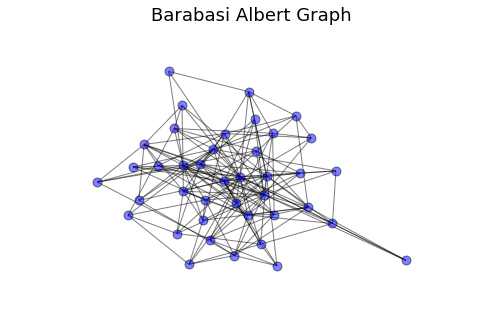

In [18]:
ba=nx.barabasi_albert_graph(40,5)
nx.draw(ba, node_size=80,node_color="blue", alpha=0.5) 
#nx.draw_circular(ba, node_size=80,node_color="blue", alpha=0.5) 
gr.title('Barabasi Albert Graph', fontsize= 18) # Se requiere de matplotlib... aqui esta importada como gr
gr.show()

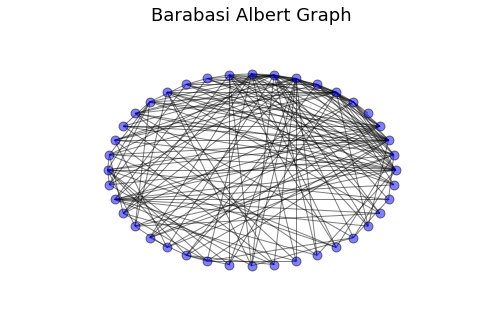

In [19]:
ba=nx.barabasi_albert_graph(40,5)
#nx.draw(ba, node_size=80,node_color="blue", alpha=0.5) 
nx.draw_circular(ba, node_size=80,node_color="blue", alpha=0.5) 
gr.title('Barabasi Albert Graph', fontsize= 18) # Se requiere de matplotlib... aqui esta importada como gr
gr.show()

In [20]:
nx.average_shortest_path_length(ba)

1.8833333333333333

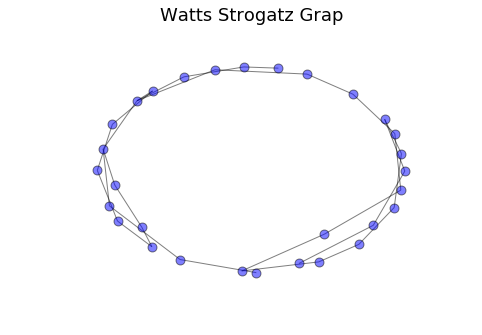

In [21]:
nx.draw(ws, node_size=80,node_color="blue", alpha=0.5)  
gr.title('Watts Strogatz Grap', fontsize= 18) # Se requiere de matplotlib... aqui esta importada como gr
gr.show()

In [22]:
nx.average_shortest_path_length(ws)

7.485057471264367

# A dibujar!!!

Ahora elijan una gráfica de las que generamos anteriormente y muestrenla a los demás

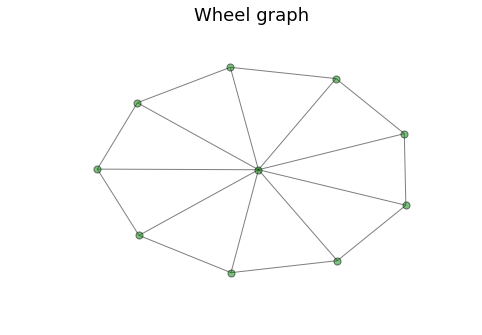

In [25]:
nx.draw(W, node_size=50,node_color="green", alpha=0.5) 
gr.title('Wheel graph', fontsize= 18) 
gr.show()

In [26]:
nx.average_shortest_path_length(W)

1.6

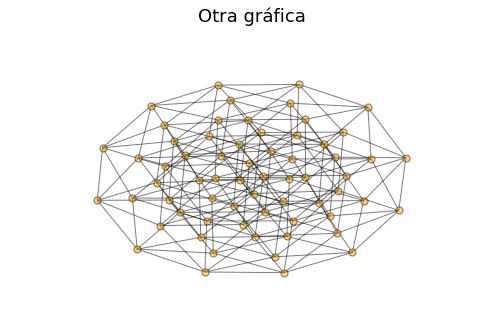

In [58]:
Hyp=nx.hypercube_graph(6)
nx.draw(Hyp, node_size=50,node_color="orange", alpha=0.5) 
gr.title('Otra gráfica', fontsize= 18) 
gr.show()

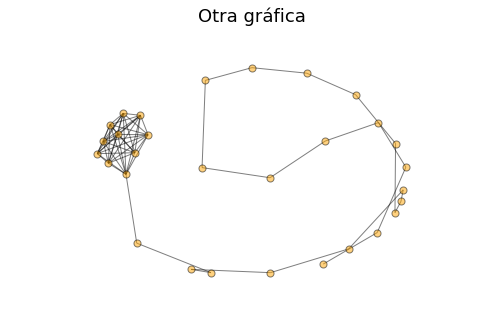

In [48]:
lollipop=nx.lollipop_graph(10,20)
nx.draw(lollipop, node_size=50,node_color="orange", alpha=0.5) 
gr.title('Otra gráfica', fontsize= 18) 
gr.show()

In [50]:
nx.average_shortest_path_length(lollipop)

8.402298850574713

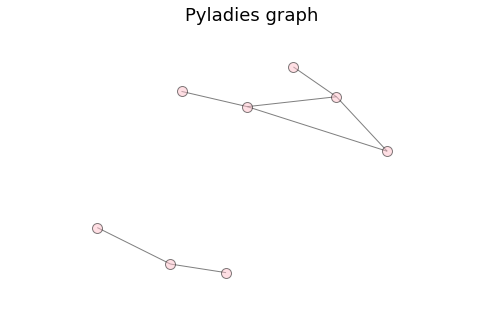

In [51]:
nx.draw(GPL, node_size=100, node_color="pink", alpha=0.5) 
gr.title('Pyladies graph', fontsize= 18) 
gr.show()

In [34]:
nx.average_shortest_path_length(GPL)

NameError: name 'GPL' is not defined

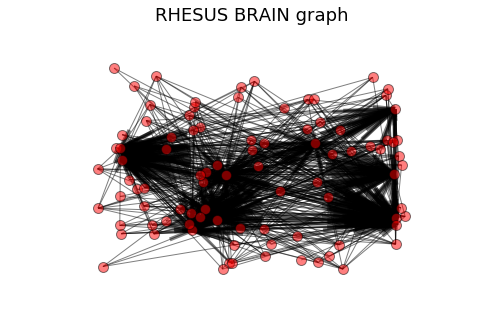

In [59]:
nx.draw_random(RB, node_size=100, node_color="RED", alpha=0.5) 
gr.title('RHESUS BRAIN graph', fontsize= 18) 
gr.show()

In [60]:
nx.average_shortest_path_length(RB)

0.1652014652014652